# Assignment - Logistic Regression


We hope this assignment gives you some idea on what logistic regression is. So let's get started...

### Importing libraries

Let us import some basic libraries that we would need to code this up. <br/>
Just run the cell below, and you'll be good to go

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Initialize parameters:

Before we start with logistic regression we want to initialize our parameters W and b.<br/>
Complete the below code<br/>
**Hint: ** Use np.zeros(shape) - shape is a tuple

In [155]:
def initialize_params(X):
    '''
    This method is to initialize the parameters W and b.
    You might want to use X.shape for this
    Input: X training samples with shape (n,m)
    Output: W-set of weights (1,n), and b-bias (real number) both initialized to zeros
    '''
    # complete the following lines
    n,m = X.shape  
    W = None
    b = None
    
    return (W,b)   

Run the below cell to check if you've got it right.<br/>


In [156]:
X = np.random.randn(2,100)
W,b = initialize_params(X)
print('W = ', W)
print('b = ',b)

W =  None
b =  None


### Sigmoid activation

Our logistic regression uses sigmoid function. So let's complete this function.

#### ***NOTE***
The formula of sigmoid function is as follows:

$$
    \sigma (z) = 1 / 1 + pow(e,-z)
$$
**Hint:** Use np.exp()

In [157]:
def sigmoid(Z):
    '''
    In this method you implement sigmoid function.
    Input: Z is an numpy array or any real number
    Output: sigmoid(z), the formula is shown above
    '''
    #Complete the following lines
    sigmoid = None
    return sigmoid

Run the below code to check if you've got it right.

In [158]:
Z1 = np.array([i for i in range(-10,10)])
Z2 = 24.12
print('Sigmoid(Z1): ',sigmoid(Z1))
print('Sigmoid(Z2): ',sigmoid(Z2))

Sigmoid(Z1):  None
Sigmoid(Z2):  None


Let us visualize what you have coded..

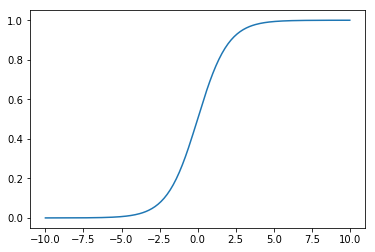

In [139]:
z = np.array([i/10 for i in range(-100,101)])
plt.plot(z,sigmoid(z))

### Forward Propagation

Remember in forward propagation we compute Z and A. <br/>
Complete the following function.<br/>

**Hint:** Use np.dot() for matrix multiplication

In [159]:
def forward_prop(X,W,b):
    '''
    This method performs forward propagation that was taught with respect to computation graph.
    Input: X (n,m) matrix, W (1,n) weights, b (real number) bias
    Output: Z = WX+b, A = sigmoid(Z)
    Hint: use the sigmoid function you already coded.
    '''
    #Complete the following lines
    Z = None
    A = None
    
    forward_cache = (A,Z)
    return forward_cache
    

Run the cell below to check if you've got it right.

In [160]:
X = np.array([[1, 2],[3, 4]])
W = np.array([[1.45, 0.13]])
b = 10

A,Z = forward_prop(X,W,b)

print('A : ',A)
print('Z : ',Z)

A :  None
Z :  None


### Compute Cost
Remember computing cost is an important step to make sure your gradient descent algorithm is converging. <br/>

##### Formula for cost function is,
$$
    J(W,b) =-1/m  ∑_i( y(i) * log( a(i) ) + ( 1 - y(i) ) * log( 1 - a(i) ) 
$$
<br/>
##### Remember to vectorize this
Complete the following function.

**Hint: ** Use np.dot() for matrix multiplication and np.log() for log value

In [162]:
def compute_cost(A, Y):
    '''
    This function returns the cost: average loss over the entire set
    Input: A - (1,m) set of activations
           Y - (1,m) set of target outputs
    Output: Cost
    '''
    m = A.shape[1]
    #Complete this line
    cost = None
    # if cost is something like [[value]] use return np.squeeze(cost)
    return np.squeeze(cost)

Run the cell below to check if you've got it right.

In [163]:
A = np.array([[ 0.99999279 , 0.99999851]])
y = np.array([[0, 1]])

c = compute_cost(A,y)
print(c)

None


### Back propagation

Remember in back propagation we compute dZ, dW and db.
<br/> Complete the following code.

In [164]:
def back_prop(X, Y, forward_cache):
    '''
    This function implements backpropagation step mentioned in the session.
    we want to compute dZ, dW, db
    Input: X - (n,m) matrix
           Y - (1,m) Output vector
           forward_cache - tuple (A(1,m), Z(1,m))
    Output: backward_cache - (dW, db)
    '''
    m = X.shape[1]
    A = forward_cache[0]
    #complete the following lines
    dZ = None
    dW = None
    db = None
    
    backward_cache = (dW, db)
    return backward_cache

Run the cell below to check if you've got it right.

In [169]:
X = np.array([[1, 2],[3, 4]])
W = np.array([[1.45, 0.13]])
b = 10
Y = np.array([[0, 1]])

f_c = forward_prop(X,W,b)
(dW, db) = back_prop(X, Y, f_c)
print('A : ',f_c[0])
print('Z : ',f_c[1])
print('dW : ',dW)
print('db : ',db)


A :  None
Z :  None
dW :  None
db :  None


### Logistic regression on admission dataset

Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.
Your task is to build a classication model that estimates an applicant's
probability of admission based the scores from those two exams.

#### Let's get started by loading the data
Run the below cell and you will be good to go

In [170]:
dataset = pd.read_csv('exam.csv')
y = np.array(dataset['y'])
y = y.reshape((1,y.shape[0])) # reshaped to (1,m) m=100
X = np.array([dataset['x1'],dataset['x2']]) #reshaped to (n,m) n=2, m=100
X.shape

(2, 100)

#### Let us visualize dataset
Run the cell below

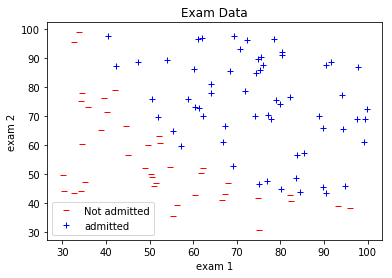

In [171]:
indicies = np.array([[i for i in range(y.shape[1])]])

#class 0 examples
class_zero = indicies[y==0]
#class 1 examples
class_one = indicies[y==1]

plt.plot(X[0,class_zero],X[1,class_zero],'r_', label='Not admitted')
plt.plot(X[0,class_one], X[1,class_one], 'b+', label = 'admitted')
plt.title('Exam Data')
plt.xlabel('exam 1')
plt.ylabel('exam 2')
plt.legend()

#### Logistic regression model

Complete the code lines in the following cell

In [173]:
def logistic_regression_model(X, y, iterations=1500, alpha = 0.001):
    '''
    This function implements the gradient descent optimization on cost function that you have coded.
    Input: X - training X (n,m)
           y - training output (1,m)
           iterations: number of iterations of gradient descent (by default set to 1500)
           alpha: learning rate (by default set to 0.01)
    Output: learned parameters W,b
    '''
    
    m = X.shape[1]
    n = X.shape[0]
    
    #Initialize parameters (use the function you implemented)
    W,b = None
    
    #print(W, b)
    #costs - list
    costs = []
    iters = []
    
    #Complete the following lines
    #Gradient descent algorithm loop
    for i in range(iterations):
        
        #forward propagation step. (use the function you already implemented)
        forward_cache = None
        A = forward_cache[0]
        Z = forward_cache[1]
        
        #Compute cost
        cost = None
        
        costs.append(cost)
        iters.append(i+1)
        #print cost every 100 iterations
        if (i+1)%100==0:
            print('Cost after ',(i+1),' iterations: ',cost)
            
        #backward propagation step. (use the function you already implemented)
        backward_cache = None
        
        dW = backward_cache[0]
        db = backward_cache[1]
        
        #Update parameters
        #(gradient descent update rule)
        W = None
        b = None
    return W,b,costs,iters

#### Run the logistic model for the given dataset
Run the cell given below

In [174]:
x = X.copy()

#Following two code lines normalize the dataset. Check out what is normalizing and why we do it
x[0,:] = (x[0,:] - np.mean(x[0,:]))/np.std(x[0,:])
x[1,:] = (x[1,:] - np.mean(x[1,:]))/np.std(x[1,:])
W,b,costs,iters = logistic_regression_model(x, y, iterations=400,alpha = 0.01)
print(W,b)

TypeError: 'NoneType' object is not iterable

#### Plot cost v/s iterations
Run the cell below

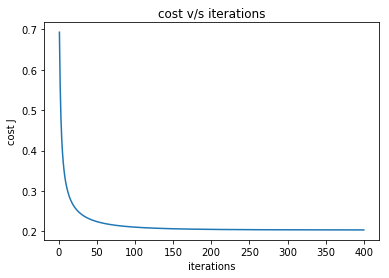

In [150]:
plt.title('cost v/s iterations')
plt.xlabel('iterations')
plt.ylabel('cost J')
plt.plot(iters,costs)

**Observation**: The cost decreases  in every iteration.<br/>
You can see that the change in cost after 200 iterations is almost negligible. Please feel free to change iterations and alpha value and observe the results

#### Accuracy
Let us write a function that tells us what percentage of training examples were correctly classified.<br/>Complete the following function

In [175]:
def get_accuracy(W,b,X,y):
    '''
    Function to determine accuracy in terms of percentage of correctly classified examples
    Input: Learned parameters W, b
           X - The set you want accuracy on
           y - expected value
    Output: Accuracy score
    '''
    
    #First of all let us compute the value of A using the learned parameters W and b
    #To do this call the forward_prop function that you implemented
    #Complete the following line
    A,Z = None
    
    #Now let us use the following rule to assign classes to each example,
    #if A >= 0.5 -> class 1
    #if A< 0.5 -> class 0
    #feel free to explore what is happening in the following lines
    predicted = np.int32(A>=0.5)
    difference = np.abs(y-predicted)
    m = y.shape[1]
    percentage_accuracy = (1 - (np.sum(difference)/m))*100
    print('Accuracy: ',percentage_accuracy,'% ')   

In [152]:
get_accuracy(W,b,x,y)

Accuracy:  89.0 % 


#### Plot decision boundary
let us plot and see what our decision boundary looks like.
<br/>
##### Remember the equation of decision boundary is given by: 
$ 
w1 * x1 + w2 * x2 + b = 0
$
<br/>
Which is same as
$
x2 = -(w1/w2) * x1 - (b/w2)
$
<br/>
Which is of the form
$
y = mx + c
$
<br/>
Run the cell below

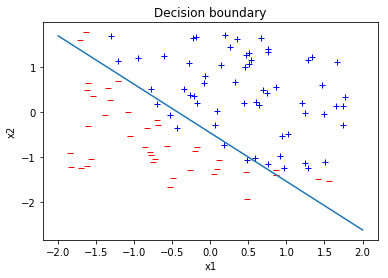

In [153]:
#Note: here m referes to slope in y=mx+c
m = -(W[0,0]/W[0,1])
c = -(b/W[0,1])

xs = np.array([i/10 for i in range(-20,21)])
plt.title('Decision boundary')
plt.ylabel('x2')
plt.xlabel('x1')
plt.plot(x[0,class_zero],x[1,class_zero],'r_', label='Not admitted')
plt.plot(x[0,class_one], x[1,class_one], 'b+', label = 'admitted')
plt.plot(xs, m*xs+c)

## Congratulations on implementing logistic regression for binary classification
###### Do explore multi-class classification using softmax activation

### Thank you for your patience, Have a good day!